# Example Notebook for Basic Model Training on DSBA Platform

In [1]:
pip install python-dotenv


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Setup the environment
import time
from dotenv import load_dotenv
load_dotenv()

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s", datefmt='%H:%M:%S,')

In [2]:
# Data loading
from dsba.data_ingestion import load_csv_from_url
titanic_dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
titanic = load_csv_from_url(titanic_dataset_url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Problem setting
from dsba.preprocessing import split_dataframe
titanic_train, titanic_test = split_dataframe(titanic, test_size=0.2)
target_column = "Survived"

In [4]:
# Training
from dsba.model_training import train_simple_classifier
clf, metadata = train_simple_classifier(titanic_train, target_column, "titanic_model")

09:44:06, [INFO] Start training a simple classifier
09:44:06, [INFO] Done training a simple classifier


In [ ]:
# Training other model
from dsba.model_training import train_simple_classifier
clf, metadata = train_simple_classifier(titanic_train, target_column, "titanic_model")

In [5]:
# Add the model to the platform
from dsba.model_registry import save_model
save_model(clf, metadata)

09:44:10, [INFO] Save model to path: /Users/solene.leboucher/dsba-platform/models_registry/titanic_model.pkl


09:44:20, [WARNING] Matplotlib is building the font cache; this may take a moment.
09:44:24, [INFO] Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: Could not set the fontsize (invalid pixel size; error code 0x17)
09:44:24, [INFO] Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: Could not set the fontsize (invalid pixel size; error code 0x17)
09:44:24, [INFO] Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
09:44:24, [INFO] generated new fontManager


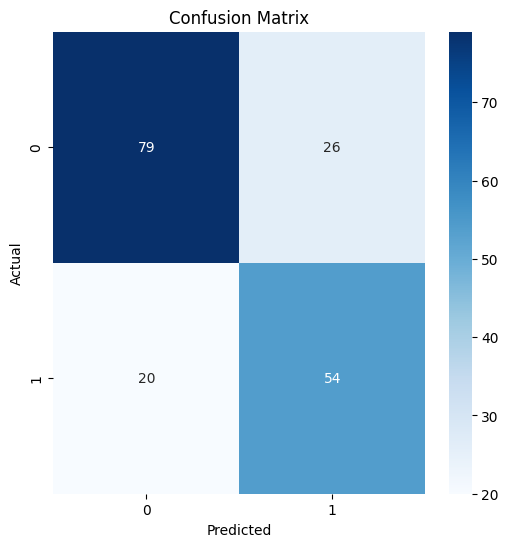

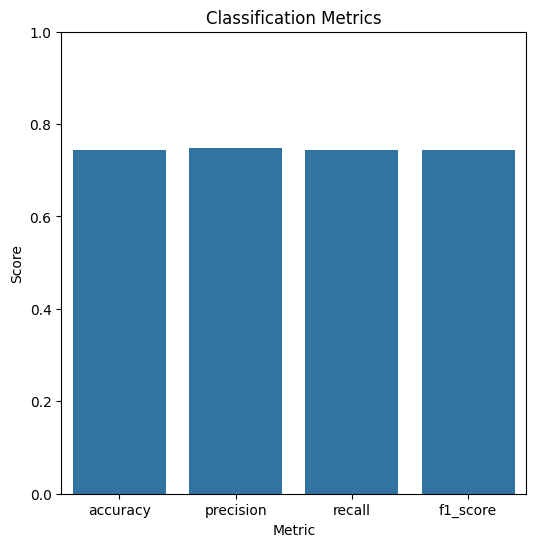

In [6]:
from dsba.model_evaluation import evaluate_classifier
from dsba.model_evaluation import visualize_classification_evaluation

model_evaluation = evaluate_classifier(clf, target_column, titanic_test)
visualize_classification_evaluation(model_evaluation)